In [12]:
# [OpenCV-Python] OpenCV 核心操作 部分 III - _Undo - 博客园 
# https://www.cnblogs.com/Undo-self-blog/p/8424220.html

import cv2
import numpy as np

img=cv2.imread('messi5.jpg')

# 读取某个像素点的值，BGR
px=img[100,100]
print(px)

blue=img[100,100,0]
print(blue)

# 修改某个像素点的值
img[100,100]=(0,0,0)
px=img[100,100]
print(px)

[10 16 15]
10
[0 0 0]


In [13]:
# 图片尺寸
a=np.size(img)
print(a)

b=img.shape  # 长宽高
print(b)

c=img.size  # 矩阵中元素数目
print(c)

d=img.dtype  # 数据类型
print(d)

# 所有像素点的值
print()
print(img)

276750
(246, 375, 3)
276750
uint8

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[23 31 48]
  [ 3 12 25]
  [22 29 38]
  ...
  [19 47 48]
  [27 47 48]
  [33 45 49]]

 [[47 55 72]
  [25 34 47]
  [19 26 35]
  ...
  [17 49 48]
  [27 49 47]
  [33 48 50]]

 [[67 75 92]
  [56 65 78]
  [26 33 42]
  ...
  [13 48 44]
  [24 48 46]
  [32 48 47]]]


In [16]:
# 对图像 ROI 进行操作

import cv2
import numpy as np

img=cv2.imread('messi6.jpg')
ball=img[280:340,330:390]         # 读取 ROI 中的数据
img[273:333,100-80:160-80]=ball   # 将 ROI 中的数据移动到图像另外一个地方

# 显示图像
cv2.namedWindow('modify', cv2.WINDOW_NORMAL)  # 可以调整窗口大小
cv2.imshow('modify',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

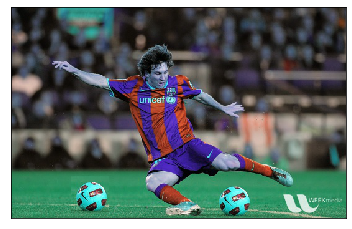

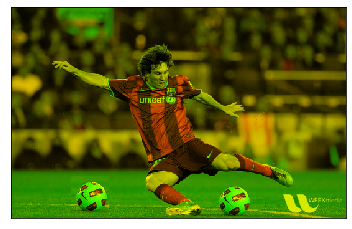

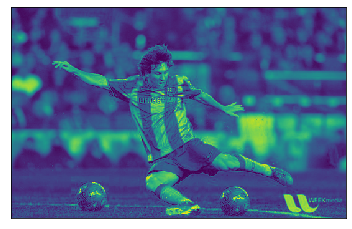

In [23]:
# 拆分及合并颜色通道

import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('messi6.jpg')

plt.figure()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# 将第三个颜色通道赋值为0
b,g,r=cv2.split(img)
img[:,:,2]=0

plt.figure()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# 只取第一个颜色通道
b,g,r=cv2.split(img)
img=img[:,:,0]  # img 变成二维矩阵了

plt.figure()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

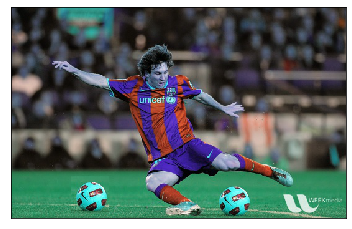

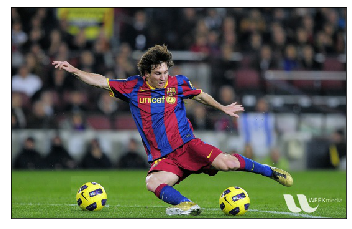

In [24]:
# 拆分及合并颜色通道

import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('messi6.jpg')

plt.figure()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# 转换为一般的 RGB 顺序，matplotlib 就可以正确显示图片了。
b,g,r=cv2.split(img)
img=cv2.merge([r,g,b])

plt.figure()
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
# 图像加法

x = np.uint8([250])
y = np.uint8([10])

# 饱和操作
a = cv2.add(x,y) 
print(a)  # 250+10 = 260 => 255

# 模操作
b = x+y
print(b)  # 250+10 = 260 % 256 = 4

[[255]]
[4]


In [30]:
# 程序性能检测
# 统计代码运行时间

# your code execution
e1 = cv2.getTickCount()
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

6.13e-05


In [32]:
# 统计代码运行时间

img1 = cv2.imread('messi5.jpg')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
time = (e2 - e1)/cv2.getTickFrequency()
print(time)

0.4137308


In [34]:
# 统计代码运行时间
# 使用 time 模块

import time

img1 = cv2.imread('messi5.jpg')

e1 = time.time()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = time.time()

time = e2 - e1
print(time)

0.40848636627197266


In [42]:
# 默认优化
# check if optimization is enabled
Flag = cv2.useOptimized()
print(Flag)
%timeit res = cv2.medianBlur(img,49)

# Disable it
cv2.setUseOptimized(False)
Flag = cv2.useOptimized()
print(Flag)
%timeit res = cv2.medianBlur(img,49)

# 实测关闭优化后计算时间短一些

False
18.7 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
False
18.7 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
# 魔法命令%time

x = 5

%timeit y = x**2
%timeit y = x*x
%timeit y = np.square(x)

# 跟官方教程的结果不一样

292 ns ± 6.08 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
50.9 ns ± 1.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
783 ns ± 8.73 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
# %timeit z = cv2.countNonZero(img)
%timeit z = np.count_nonzero(img)

# 上一条命令无法正确运行，可能是 PyTorch 版本的问题

841 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
